# [AIFFEL_Going Deeper_2] 카메라 스티커앱 만들기 첫걸음

## 프로젝트 내용
사진 위에 고양이 수염 이미지 적용하기

## 목차
#### 1. 사진 위에 고양이 수염 이미지 적용하기
- Step 1. 필요한 라이브러리 불러오기     
- Step 2. 스티커 구하기 / 만들기     
2-1. 고양이 수염 이미지 불러오기           
2-2. 내 사진 불러오기     
- Step 3. 얼굴 검출 & 랜드마크 검출하기     
3-1. face detection      
3-2. 얼굴 랜드마크 face landmark       
- Step 4. 스티커 적용 위치 확인하기      
4-1. 좌표를 먼저 확인      
4-2. 스티커 이미지 불러오기, 스티커 이미지의 사이즈에 맞추어 resize      
4-3. 원본 이미지에 스티커 이미지 추가 위해 x, y 좌표 위치 조정      
4-4. x, y 좌표에서 음수가 나오는 경우     
- Step 5. 스티커 적용하기     
5-1. 원본 이미지에 스티커 적용     
5-2. 결과 이미지 출력     
5-3. bounding box, landmark 제거 후 np.where() 활용해 최종 출력     
5-4. 스티커 불투명하게 만들기(OpenCV의 cv2.addWeighted() 활용) 
- Step 6. 문제점 찾아보기
문제점 1. 옆을 보고 있는 사진에는 스티커가 휘어져 붙지 않아 어색해 보여요.     
문제점 2. 옆으로 누운 사진은 bounding box 검출이 되지 않아요.
#### 2. 결론
#### 3. 루브릭 관련 고려한 점
#### 4. 탐구 및 시도 모음
#### 5. 회고      
#### 6. References     

## 글씨 색 표시
### <span style = "color:orange;">- 노랑: 질문! or 짚고가자!</span>    
### <span style = "color:red;">- 빨강: 중요 or 특이사항</span>

## 이번 프로젝트는 욘두가 많이 생각나는 프로젝트

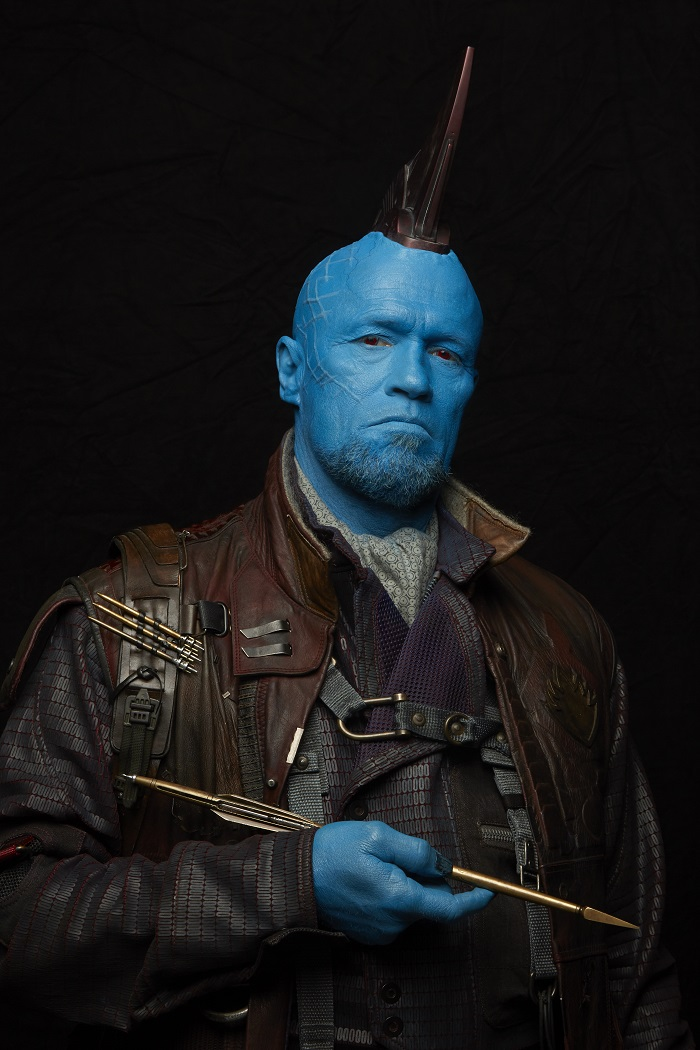

In [74]:
Image("[GD_2_Camera] images/12.jpg")

# 1. 사진 위에 고양이 수염 이미지 적용하기

## Step 1. 필요한 라이브러리 불러오기

In [2]:
import os 
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 
import dlib

print("슝슝")

print(cv2.__version__)
print(dlib.__version__)

슝슝
4.5.3
19.22.1


### <span style = "color:orange;">잠깐! 모듈/라이브러리 정리</span>
(출처_노드)
- os란? 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈    
- cv2란? OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
- dlib란? 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 

In [3]:
!pip install IPython # 주피터에 이미지를 넣기 위해 패키지 설치 
from IPython.display import Image

## Step 2. 스티커 구하기 / 만들기

## Step 2-1. 고양이 수염 이미지 불러오기

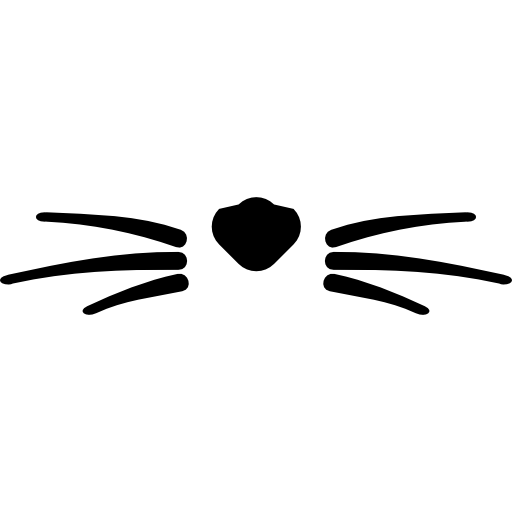

In [4]:
Image("[GD_2_Camera] images/cat-whiskers.png")

## Step 2-2. 내 사진 불러오기

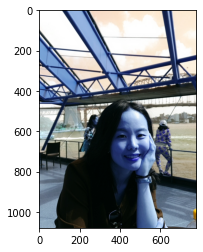

In [5]:
# 주석 출처_노드
my_image_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_2_Camera] images/노근아_2.jpg' 
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy() # 출력용 따로 보관(출처_노드)      
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려줌(실제 출력은 x, )
plt.show() # 이미지 출력(실제 출력)

### <span style = "color:orange;">이렇게 나오는 이유는?</span>

보통 Matplotlib, dlib와 같은 이미지 라이브러리는 이미지 채널을 RGB(빨강, 녹색, 파랑) 순으로 사용    
BUT OpenCV는 예외적으로 BGR(파랑, 녹색, 빨강)을 사용    
-> 그래서 붉은색은 푸른색으로, 푸른색은 붉은색으로 바꾸어 출력함    

**원래의 색감으로 출력하려면 cv2.cvtColor()를 사용**   

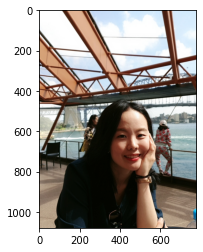

In [6]:
# plt.imshow 이전에 RGB 이미지로 바꾸기 중요!

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라 한다(출처_노드)
plt.show()

## Step 3. 얼굴 검출 & 랜드마크 검출하기
## Step 3-1. face detection
1. dlib을 활용해 hog detector를 선언
2. detector_hog를 이용해서 얼굴의 bounding box를 추출
3. 찾은 얼굴을 화면에 출력

#### 1. dlib을 활용해 hog detector를 선언

In [7]:
# dlib.get_frontal_face_detector()을 detector_hog라는 변수에 담아주기
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기 반환
print("슝슝")

슝슝


### <span style = "color:orange;"> What is detector?</span>
공식문서에는 Returns the default face detector라고 되어있다.    
얼굴 탐지한 결과를 return 한다고 볼 수 있겠다.   

[출처: http://dlib.net/python/index.html#dlib_pybind11.get_frontal_face_detector]

#### 2. detector_hog를 이용해서 얼굴의 bounding box를 추출

In [8]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) 
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("슝슝")

슝슝


### <span style = "color:red;">코드 주석</span>
**dlib은 rgb이미지를 입력으로 받는다.**    
때문에 cvtcolor()를 이용해서 opencv의 bgr이미지를 rgb로 변환, cv2.cvtColor() 사용

**detector_hog()의 두 번째 파라미터는 이미지 피라미드의 수**     
이미지 피라미드: upsampling 방법을 통해 크기를 키우는 것     
이미지 피라미드를 해서 얼굴을 검출하면 작게 촬영된 얼굴을 크게 볼 수 있어, 정확한 bounding box 검출이 가능하다.

#### 3. 찾은 얼굴을 화면에 출력

rectangles[[(340, 563) (563, 786)]]


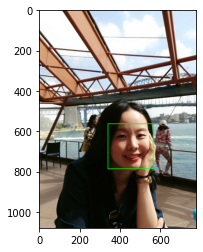

In [9]:
# 주석 출처_노드 
# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그려줌

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) 
plt.imshow(img_show_rgb)
plt.show()

## Step 3-2. 얼굴 랜드마크 face landmark
1. 저장한 landmark 모델 불러오기
2. 얼굴 영역 박스 마다 face landmark 찾기
3. 랜드마크를 사진 위에 출력

#### 1. 저장한 landmark 모델 불러오기

In [10]:
# 주석 출처_노드
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델 불러오기
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환

print("슝슝")

슝슝


#### 2. 얼굴 영역 박스 마다 face landmark 찾기

In [11]:
list_landmarks = []
 
# 얼굴 영역 박스 마다 face landmark를 찾아 좌표 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list(출처_노드)

68


### <span style = "color:red;"> lambda 함수</span>
**lambda 매개변수 : 표현식**     

def hap(x, y):     
    return x + y   
-> hap(10, 20)    
30

(lambda x,y: x + y)(10, 20)    
-> 30

In [12]:
print(list_landmarks)

[[(342, 640), (344, 669), (348, 699), (357, 728), (373, 753), (394, 772), (419, 787), (445, 795), (470, 794), (492, 786), (508, 768), (525, 748), (537, 724), (545, 699), (549, 673), (549, 646), (548, 621), (368, 605), (383, 591), (403, 587), (424, 589), (442, 597), (473, 597), (489, 588), (507, 584), (524, 587), (535, 599), (462, 620), (464, 638), (466, 656), (468, 676), (444, 692), (456, 694), (468, 697), (478, 692), (486, 688), (391, 627), (404, 620), (417, 620), (430, 629), (417, 630), (404, 630), (484, 628), (495, 618), (507, 616), (518, 621), (509, 625), (497, 627), (416, 724), (436, 716), (456, 711), (468, 713), (479, 710), (494, 712), (505, 716), (494, 735), (482, 745), (469, 748), (456, 748), (437, 741), (422, 724), (456, 721), (468, 721), (480, 719), (500, 718), (480, 732), (468, 735), (456, 735)]]


### <span style = "color:red;">list_landmarks</span>
내 사진의 얼굴 영역 박스 마다 찾은 face landmark들의 좌표들이 저장되어 있음    
총 68개(68개의 랜드마크들을 찾아주는 모델이라서)

#### 3. 랜드마크를 사진 위에 출력

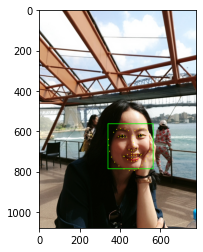

In [13]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)(출처_노드)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Step 4. 스티커 적용 위치 확인하기
고양이 수염이 적용될 위치를 landmark를 사용해서 계산하기

## Step 4-1. 좌표를 먼저 확인

In [14]:
# 주석 출처_노드
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): 
    print (landmark[30]) # 코의 index = 30
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 
    # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() 
    # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1
    # (픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(468, 676)
(x,y) : (468,564)
(w,h) : (224,224)


### <span style = "color:red;">코드 주석</span>
dlib_rects와 list_landmarks 데이터를 zip()함수를 통해 묶어줌    
dlib_rects는 위에서 dlib_rects = detector_hog(img_rgb, 1)이렇게 정의해줌, 얼굴영역의 값

## Step 4-2. 스티커 이미지 불러오기, 스티커 이미지의 사이즈에 맞추어 resize

In [15]:
sticker_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_2_Camera] images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w,h)) 
print (img_sticker.shape) 

(224, 224, 3)


In [16]:
print(img_sticker)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


## Step 4-3. 원본 이미지에 스티커 이미지 추가 위해 x, y 좌표 위치 조정
이미지 시작점은 top-left 좌표이기 때문

In [17]:
refined_x = x - w // 2 
refined_y = y - h 
# refined_x, refined_y값에서 이미지가 시작

print (f'(x,y) : ({refined_x},{refined_y})') 

(x,y) : (356,340)


## Step 4-4. x, y 좌표에서 음수가 나오는 경우
음수 발생 : 이미지 범위를 벗어남을 의미 

(출처_노드)    
예: 이마 자리에 왕관을 두고 싶은건데, 이마위치 - 왕관 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것    
opencv는 ndarray데이터를 사용, ndarray는 음수인덱스에 접근 불가, 그래서 스티커 이미지를 잘라주어야 한다

In [ ]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

In [ ]:
참고:  예시: (x,y) : (344,0)

## Step 5. 스티커 적용하기
1. np.where 를 사용해 스티커를 적용
2. 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 보기, opencv 의 cv2.addWeighted() 를 참고

## Step 5-1. 원본 이미지에 스티커 적용

In [18]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지!!

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법(출처_노드)

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
print("슝슝")

슝슝


## Step 5-2. 결과 이미지 출력

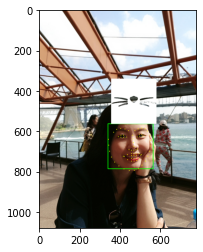

In [19]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### <span style = "color:red;">잠깐! 이렇게 나오는 이유는?</span>
1. 스티커의 위치를 조절해야 한다. 
2. 스티커의 배경이 흰색으로 나오므로 image_sticker의 숫자를 조절해 수염만 보이게 만들어 주어야 한다.

### 왜?
print(img_sticker)를 해보면 값이 255로 채워져있는걸 알 수 있다    
이 255가 의미하는 바는? -> 흰색이 255      
우리는 검정색 부분 0인 부분을 나오게 할 것이므로 원래 코드에서 바꾸어 주어야 한다

In [20]:
print(img_sticker)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


### <span style = "color:red;">다시 조정하면</span>

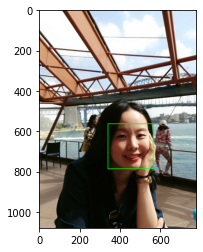

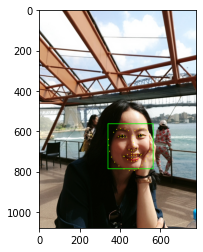

In [21]:
my_image_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_2_Camera] images/노근아_2.jpg' 
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


detector_hog = dlib.get_frontal_face_detector() 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   

for dlib_rect in dlib_rects: 
    l = dlib_rect.left() 
    t = dlib_rect.top() 
    r = dlib_rect.right() 
    b = dlib_rect.bottom() 

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) 

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()



model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

        img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_rgb)
plt.show()

In [22]:
# 스티커 적용

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[8]) 
    x = landmark[8][0] 
    y = landmark[8][1]  
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')
    
sticker_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_2_Camera] images/cat-whiskers.png' 
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h)) 

refined_x = x - w // 2 
refined_y = y - h 

print (f'(x,y) : ({refined_x},{refined_y})') 

# 음수가 나오지 않았으므로 조정하지 x

(470, 794)
(x,y) : (470,794)
(w,h) : (224,224)
(x,y) : (358,570)


### <span style = "color:red;">이 아래 코드에서 img_sticker==0을 img_sticker==255으로 바꿔줌</span>

In [23]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
print("슝슝")

슝슝


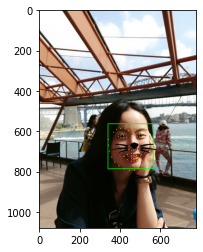

In [24]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### <span style = "color:red;">오케이 재조정 성공!!!!!</span>

## Step 5-3. bounding box, landmark 제거 후 np.where() 활용해 최종 출력
1. bounding box와 landmark를 제거하고 최종 결과만 출력
2. img_show 대신, img_bgr을 활용

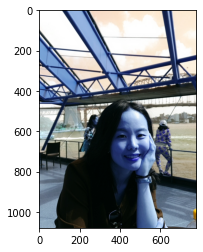

In [25]:
plt.imshow(img_bgr)
plt.show()

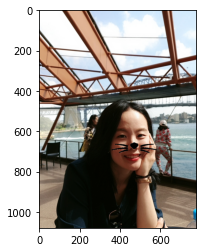

In [26]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# img_bgr은 rgb로만 적용해놓은 원본 이미지 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) 
plt.show()

### <span style = "color:orange;">np.where란?</span>
조건을 만족하는 인덱스를 반환하는 함수     

a = np.arange(5, 15) # array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])    
np.where(a > 10) # 6 ~ 9번 위치가 만족 -> (array([6, 7, 8, 9]),)    
np.where(a % 3 == 0) # 1, 4, 7번 위치가 6, 9, 12로 만족 -> (array([1, 4, 7]),)     

[출처: https://jimmy-ai.tistory.com/46]    

## Step 5-4. 스티커 불투명하게 만들기(OpenCV의 cv2.addWeighted() 활용) 

### <span style = "color:orange;">cv2.addWeighted()란?</span>

가중치 합, 평균 연산하는 함수     
각각의 영상에 가중치를 곱하여 더해주면 두 입력 영상의 평균 밝기를 유지할 수 있다.     
그렇게 하기 위해 cv2.addWeighted() 함수 이용     
  
작동원리는 두 영상의 같은 위치에 존재하는 픽셀 값에 대하여 가중합을 계산하여 결과 영상의 픽셀 값으로 설정한다고 한다.    
덧셈 연산을 할 시에 많은 부분이 흰색으로 나온다.     


cv2.addWeighted()     
cv2.addWeighted(src1, alpha, src2, beta, gamma, dst=None, dtype=None) -> dst     
• src1: (입력) 첫 번째 영상     
• alpha: 첫 번째 영상 가중치     
• src2: 두 번째 영상. src1과 같은 크기 & 같은 타입     
• beta: 두 번째 영상 가중치     
• gamma: 결과 영상에 추가적으로 더할 값    
• dst: 가중치 합 결과 영상    
• dtype: 출력 영상(dst)의 타입    

[출처: https://deep-learning-study.tistory.com/115]

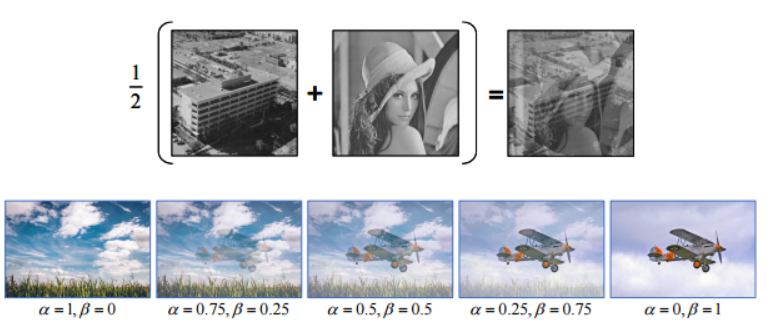

In [31]:
Image("[GD_2_Camera] images/07.PNG")

### cv2.addWeighted()를 적용하기 위해 이미지를 다시 불러오고 
### sticker_area(원본이미지에서 스티커 크기만큼 자른 이미지), img_sticker(resize한 스티커 이미지) 불러오기

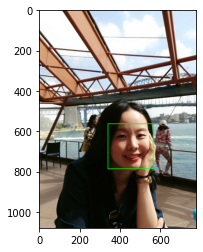

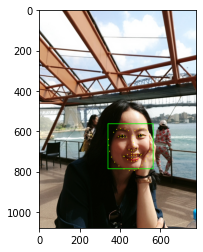

In [44]:
my_image_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_2_Camera] images/노근아_2.jpg' 
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


detector_hog = dlib.get_frontal_face_detector() 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   

for dlib_rect in dlib_rects: 
    l = dlib_rect.left() 
    t = dlib_rect.top() 
    r = dlib_rect.right() 
    b = dlib_rect.bottom() 

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) 

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()



model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

        img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_rgb)
plt.show()

In [45]:
# 스티커 적용

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[8]) 
    x = landmark[8][0] 
    y = landmark[8][1]  
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')
    
sticker_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_2_Camera] images/cat-whiskers.png' 
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h)) 

refined_x = x - w // 2 
refined_y = y - h 

print (f'(x,y) : ({refined_x},{refined_y})') 

# 음수가 나오지 않았으므로 조정하지 x

(470, 794)
(x,y) : (470,794)
(w,h) : (224,224)
(x,y) : (358,570)


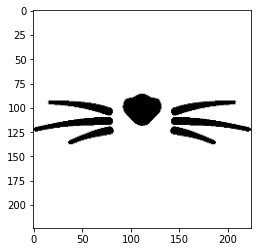

In [46]:
# 스티커인데, 스티커를 붙일 사진 사이즈에 맞추어 resize한 것 
plt.imshow(img_sticker)
plt.show()

In [47]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_show = img_bgr.copy()

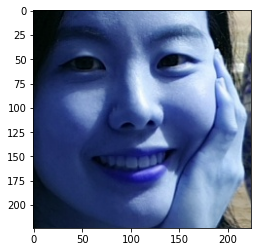

In [48]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지!!
plt.imshow(sticker_area)
plt.show()

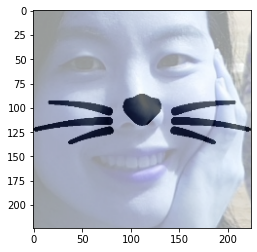

In [49]:
img_show_addweighted = cv2.addWeighted(img_sticker, 0.6, sticker_area, 0.4, 0.0)

plt.imshow(img_show_addweighted)
plt.show()

In [50]:
#  img_bgr은 rgb로만 적용해놓은 원본 이미지 
# img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
#     np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_show_addweighted).astype(np.uint8)


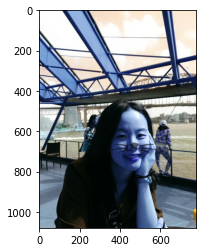

In [51]:
plt.imshow(img_bgr) 
plt.show()

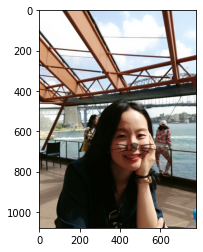

In [52]:
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) 
plt.show()

### <span style = "color:red;">해결!!!!!</span>

### 이 문제를 해결해나가며 정리한 내용
img_bgr : bgr로 읽히는 원본이미지     
img_show : 출력용으로 따로 보관한 bgr 이미지     
img_rgb : rgb로 바꾼 원본이미지     
img_show_rgb : img_show 위에 cv2.rectangle을 적용해 bounding box를 그린 이미지     
img_show_rgb: 위 img_show_rgb에 cv2.circle을 적용해 노란색으로 landmark 표시    

img_sticker : 고양이 수염 resize한 이미지     
sticker_area : img_show(출력용 bgr)에서 스티커 사이즈만큼 crop한 이미지    
img_show[인덱스:인덱스] = np.where를 적용해 스티커를 붙이기    
출력은 img_show로 함 (여기에 bounding box, landmark는 표시되어 있음)    

그래서 최종 출력시에는    
img_bgr : bgr 이미지를 사용    
다시 sticker_area를 img_bgr에서 스티커 사이즈만큼 crop한 이미지로 재할당    
그리고 나서 아까는 img_show에 np.where를 적용했다면 이번에는     
img_bgr[인덱스:인덱스] = np.where를 적용해 스티커를 붙이기    
최종 출력은 img_bgr를 rgb 색으로 바꾸어 출력   

## Step 6. 문제점 찾아보기

### 문제점 1. 옆을 보고 있는 사진에는 스티커가 휘어져 붙지 않아 어색해 보여요.

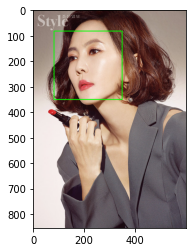

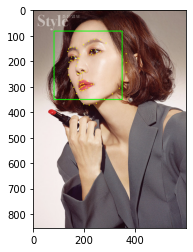

In [59]:
my_image_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_2_Camera] images/김남주.jpeg' 
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


detector_hog = dlib.get_frontal_face_detector() 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   

for dlib_rect in dlib_rects: 
    l = dlib_rect.left() 
    t = dlib_rect.top() 
    r = dlib_rect.right() 
    b = dlib_rect.bottom() 

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) 

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) 
plt.imshow(img_show_rgb)
plt.show()



model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

        img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_rgb)
plt.show()

In [61]:
# 스티커 적용

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[7]) 
    x = landmark[7][0] 
    y = landmark[7][1]  
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')
    
sticker_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_2_Camera] images/cat-whiskers.png' 
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h)) 

refined_x = x - w // 2 
refined_y = y - h 

print (f'(x,y) : ({refined_x},{refined_y})') 

# 음수가 나오지 않았으므로 조정하지 x

(198, 368)
(x,y) : (198,368)
(w,h) : (268,268)
(x,y) : (64,100)


In [62]:
print(landmark)

[(141, 204), (137, 228), (138, 254), (147, 278), (159, 302), (170, 327), (182, 350), (198, 368), (220, 372), (248, 365), (280, 348), (311, 328), (338, 306), (357, 277), (365, 243), (365, 206), (365, 171), (136, 162), (139, 152), (148, 146), (159, 145), (171, 149), (198, 135), (218, 122), (241, 114), (265, 116), (286, 129), (184, 174), (180, 189), (175, 204), (169, 219), (175, 248), (180, 249), (186, 249), (194, 245), (203, 240), (148, 197), (151, 184), (162, 181), (175, 188), (164, 195), (153, 199), (223, 174), (229, 158), (245, 156), (263, 163), (249, 171), (234, 175), (182, 307), (176, 289), (180, 276), (187, 276), (193, 272), (212, 278), (236, 290), (219, 304), (206, 311), (198, 314), (192, 316), (185, 315), (187, 304), (185, 292), (191, 289), (197, 287), (228, 291), (200, 296), (194, 298), (189, 300)]


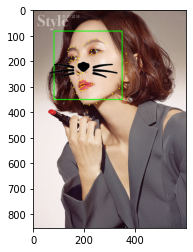

In [65]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

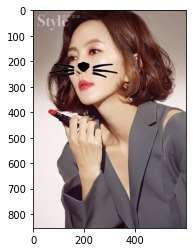

In [66]:
# 위에서 설명했으므로 생략
# 왕관 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

### <span style = "color:red;">해결: 스티커를 img_sticker에서 회전시켜서 붙여야 할 것 같다.</span>

### 문제점 2. 옆으로 누운 사진은 bounding box 검출이 되지 않아요.

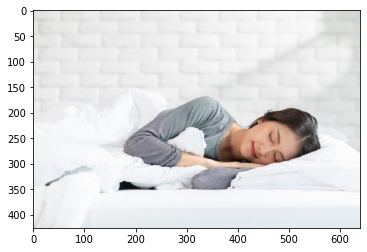

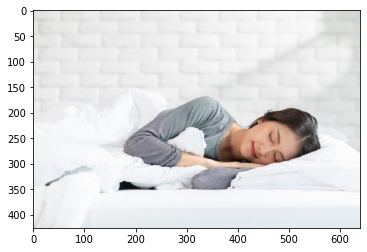

In [68]:
my_image_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_2_Camera] images/02.jpg' 
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


detector_hog = dlib.get_frontal_face_detector() 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   

for dlib_rect in dlib_rects: 
    l = dlib_rect.left() 
    t = dlib_rect.top() 
    r = dlib_rect.right() 
    b = dlib_rect.bottom() 

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) 

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) 
plt.imshow(img_show_rgb)
plt.show()



model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

        img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_rgb)
plt.show()

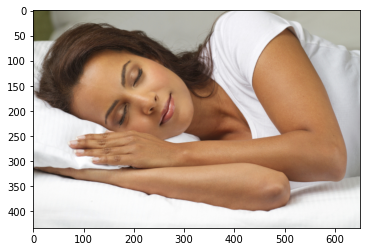

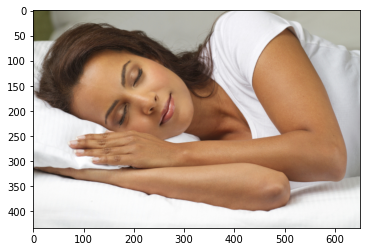

In [69]:
my_image_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_2_Camera] images/08.jpg' 
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


detector_hog = dlib.get_frontal_face_detector() 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   

for dlib_rect in dlib_rects: 
    l = dlib_rect.left() 
    t = dlib_rect.top() 
    r = dlib_rect.right() 
    b = dlib_rect.bottom() 

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) 

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) 
plt.imshow(img_show_rgb)
plt.show()



model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

        img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_rgb)
plt.show()

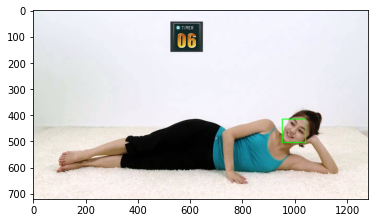

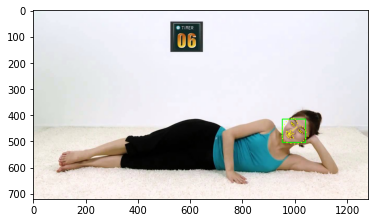

In [70]:
my_image_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_2_Camera] images/09.jpg' 
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


detector_hog = dlib.get_frontal_face_detector() 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   

for dlib_rect in dlib_rects: 
    l = dlib_rect.left() 
    t = dlib_rect.top() 
    r = dlib_rect.right() 
    b = dlib_rect.bottom() 

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) 

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) 
plt.imshow(img_show_rgb)
plt.show()



model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

        img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_rgb)
plt.show()

### <span style = "color:red;">추측</span>
1. 옆으로 누웠다고 볼 수 있으나 눈을 뜬 사진은 bounding box, landmark 인식이 되었다.
2. 눈을 감은 사진은 안 되는 걸까?    

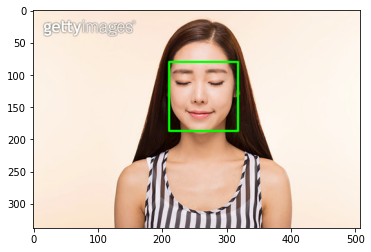

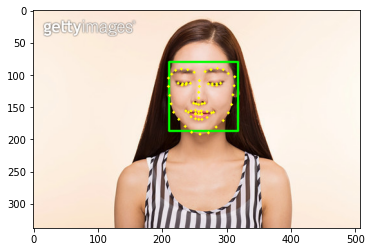

In [71]:
my_image_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_2_Camera] images/10.jpg' 
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


detector_hog = dlib.get_frontal_face_detector() 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   

for dlib_rect in dlib_rects: 
    l = dlib_rect.left() 
    t = dlib_rect.top() 
    r = dlib_rect.right() 
    b = dlib_rect.bottom() 

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) 

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) 
plt.imshow(img_show_rgb)
plt.show()



model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

        img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_rgb)
plt.show()

### <span style = "color:red;">추측</span>    
1. 위 사진은 눈을 감고 있으나 인식이 되었다.   
2. 그렇다면 각도의 차이이거나, 옆으로 누우면 가려지는 부분이 있어서 그런게 아닐까 싶다.

# 2. 결론

1. 내 사진위에 고양이 수염을 붙여보았다.
2. addWeighted()를 통해 스티커를 불투명하게 해 사진에 적용해보았다.
3. 여러 사진들에 적용해보며 다른 점들을 찾아보았다.

# 3. 루브릭 관련 고려한 점
1. 자기만의 카메라앱 기능 구현을 완수하였다.    
: 얼굴 영역과 랜드마크를 정확하게 검출하고, 스티커 사진을 합성시키는 데 성공하였다.   
**그렇다**

2. 스티커 이미지를 정확한 원본 위치에 반영하였다.     
: 정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.
**그렇다**

3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.        
: 얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.    
**이미지 밝기와 촬영거리에 대한 변수는 실험해보지 못했지만, 각도와 관련해서는 시도해보았다.**   
**보다 체계적으로 분석하지 못한 점은 아쉽다.**

# 4. 탐구 및 시도 모음
## 4-1. 여러명이 있는 사진에 스티커 적용해보기
### <span style = "color:red;">sticker_area를 bounding box의 개수만큼 적용해주어야 할 것 같다는 결론</span>

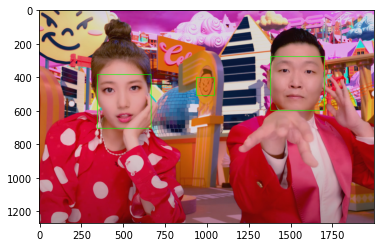

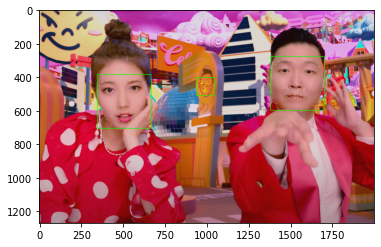

In [54]:
my_image_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_2_Camera] images/01.jpg' 
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


detector_hog = dlib.get_frontal_face_detector() 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   

for dlib_rect in dlib_rects: 
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right() 
    b = dlib_rect.bottom() 

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) 

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) 
plt.imshow(img_show_rgb)
plt.show()



model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

        img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_rgb)
plt.show()

In [55]:
# 스티커 적용

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[8]) 
    x = landmark[8][0] 
    y = landmark[8][1]  
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')
    
sticker_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_2_Camera] images/cat-whiskers.png' 
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h)) 

refined_x = x - w // 2 
refined_y = y - h 

print (f'(x,y) : ({refined_x},{refined_y})') 

# 음수가 나오지 않았으므로 조정하지 x

(1525, 609)
(x,y) : (1525,609)
(w,h) : (322,322)
(537, 745)
(x,y) : (537,745)
(w,h) : (322,322)
(992, 511)
(x,y) : (992,511)
(w,h) : (109,109)
(x,y) : (938,402)


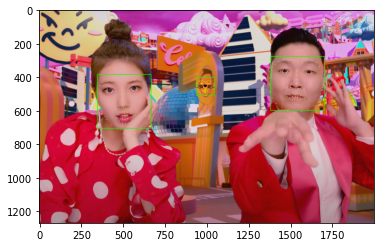

In [57]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

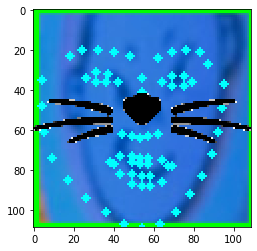

In [58]:
plt.imshow(sticker_area) 
plt.show()

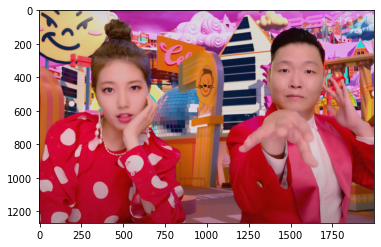

In [91]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

# 5. 회고

### 1. 프로젝트에서 어려웠던 점, 해결을 위해 시도한 방법, 문제해결에 성공한 이유 또는 실패한 이유

- **프로젝트에서 어려웠던 점**  
    스티커 이미지와 원본이미지에서 crop한 이미지에 대한 이해 부분
    

- **해결을 위해 시도한 방법**  
    1. 코드를 찬찬히 변수별로 분석해 봄
    2. addWeighted()에 대해 공부하고 적용해 봄
    

- **문제해결에 성공한 이유 또는 실패한 이유**  
    0 -> 255로 바꾸는 부분에 대해서 도대체 해결이 되지 않아 그루분께 여쭈어보고 도움을 받음  

 
### 2. 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점

- **프로젝트를 진행하면서 알아낸 점**  
1. np.where(), 프로젝트에 대한 전반적인 프로세스  


- **아직 모호한 점**    
1. print(landmark)와 landmark가 다르게 나오는 점
2. cv.rectangle과 cv.circle이 img_show_rgb에서 적용되는 과정

In [28]:
print(landmark)

[(342, 640), (344, 669), (348, 699), (357, 728), (373, 753), (394, 772), (419, 787), (445, 795), (470, 794), (492, 786), (508, 768), (525, 748), (537, 724), (545, 699), (549, 673), (549, 646), (548, 621), (368, 605), (383, 591), (403, 587), (424, 589), (442, 597), (473, 597), (489, 588), (507, 584), (524, 587), (535, 599), (462, 620), (464, 638), (466, 656), (468, 676), (444, 692), (456, 694), (468, 697), (478, 692), (486, 688), (391, 627), (404, 620), (417, 620), (430, 629), (417, 630), (404, 630), (484, 628), (495, 618), (507, 616), (518, 621), (509, 625), (497, 627), (416, 724), (436, 716), (456, 711), (468, 713), (479, 710), (494, 712), (505, 716), (494, 735), (482, 745), (469, 748), (456, 748), (437, 741), (422, 724), (456, 721), (468, 721), (480, 719), (500, 718), (480, 732), (468, 735), (456, 735)]


In [29]:
landmark

[(342, 640),
 (344, 669),
 (348, 699),
 (357, 728),
 (373, 753),
 (394, 772),
 (419, 787),
 (445, 795),
 (470, 794),
 (492, 786),
 (508, 768),
 (525, 748),
 (537, 724),
 (545, 699),
 (549, 673),
 (549, 646),
 (548, 621),
 (368, 605),
 (383, 591),
 (403, 587),
 (424, 589),
 (442, 597),
 (473, 597),
 (489, 588),
 (507, 584),
 (524, 587),
 (535, 599),
 (462, 620),
 (464, 638),
 (466, 656),
 (468, 676),
 (444, 692),
 (456, 694),
 (468, 697),
 (478, 692),
 (486, 688),
 (391, 627),
 (404, 620),
 (417, 620),
 (430, 629),
 (417, 630),
 (404, 630),
 (484, 628),
 (495, 618),
 (507, 616),
 (518, 621),
 (509, 625),
 (497, 627),
 (416, 724),
 (436, 716),
 (456, 711),
 (468, 713),
 (479, 710),
 (494, 712),
 (505, 716),
 (494, 735),
 (482, 745),
 (469, 748),
 (456, 748),
 (437, 741),
 (422, 724),
 (456, 721),
 (468, 721),
 (480, 719),
 (500, 718),
 (480, 732),
 (468, 735),
 (456, 735)]

### 3. 자기 다짐, 프로젝트를 진행하면서 느낀 점

1. 어려웠지만, 공부하며 또 성장할 수 있었던 뿌듯한 프로젝트입니다.
2. 수지, 싸이 사진에 대한 부분은 더 시도해보고 싶어요.
3. bounding box를 표시하는 부분이 신기해요.
4. opencv의 여러 함수들에 대해서 많이 모르고 있어요. 공부가 필요한 것 같아요.
5. 여러 모듈들에 대한 공부가 필요한 것 같아요. 

# 6. References

<span style = "color:gray;">dlib.get_frontal_face_detector() </span>     
http://dlib.net/python/index.html#dlib_pybind11.get_frontal_face_detector

<span style = "color:gray;">lambda 함수</span>     
https://wikidocs.net/64

<span style = "color:gray;">np.whwere()</span>     
https://jimmy-ai.tistory.com/46

<span style = "color:gray;">opencv 의 cv2.addWeighted()</span>     
https://deep-learning-study.tistory.com/115

<span style = "color:gray;">addWeighted() 공식문서</span>    
https://docs.opencv.org/3.4/d5/dc4/tutorial_adding_images.html